<a href="https://www.kaggle.com/code/parisanahmadi/ml-reinforcement-learning-by-parisan?scriptVersionId=101598623" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install gym[atari]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.3 MB/s eta 0:00:00


# Taxi-V3
(North - South - West - East - Pickup - Dropoff)

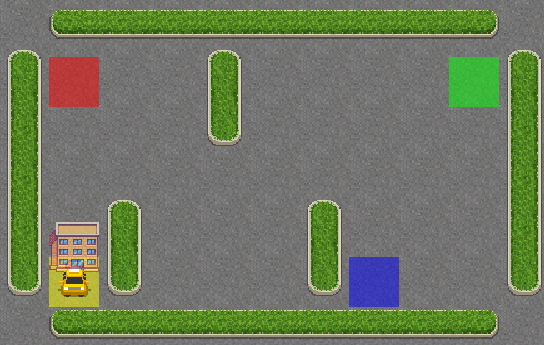

In [2]:
import numpy as np
import random

In [3]:
from IPython.display import clear_output # public API for diplay tools in IPython
import gym

# QLearning



# Then we need to create an environment

In [4]:
pip install gym[toy_text]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 36.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"


In [6]:
environment = gym.make("Taxi-v3").env
environment.reset() #For Taxi-V3 Error
environment.render()

/opt/conda/lib/python3.7/site-packages/gym/core.py:330: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/opt/conda/lib/python3.7/site-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/opt/conda/lib/python3.7/site-packages/gym

In [7]:
print("Number of states:", format(environment.observation_space.n))
print("Number of Actions:", format(environment.action_space.n))

Number of states: 500
Number of Actions: 6


# 6 Actions (North - South - West - East - Pickup - Dropoff)

# Let's first initialize necessary variables

In [8]:
alpha = 0.1
gamma = 0.6
epsilon = 0.1
q_table = np.zeros([environment.observation_space.n, environment.action_space.n])
# return a new array of givenshape and type, filled with zeros

# Then we run the training using steps

In [9]:
num_of_episodes = 100000
for episode in range(0, num_of_episodes):
    state = environment.reset()
    
    #initial variables
    reward = 0
    terminated = False 
    # the loop doesnt terminate
    
    while not terminated:
        #take learned path or explor new actions based on the epsilon
        if random.uniform(0,1) < epsilon:
            action = environment.action_space.sample()
        else:
            action = np.argmax(q_table[state])
        
        # take Action
        next_state, reward, terminated, info = environment.step(action)
        
        # recalculate
        q_value = q_table[state, action]
        max_value = np.max(q_table[next_state])
        new_q_value = (1 - alpha) * (q_value) + alpha * (reward + gamma * max_value)
        
        #update Q_table
        q_table[state, action] = new_q_value
        state = next_state
        
    if (episode + 1) % 100 == 0:
        clear_output(wait = True)
        print("episode:".format(episode+1))
        environment.render()

print("***********************************")
print("Training is Done! \n")
print("***********************************")


episode:
***********************************
Training is Done! 

***********************************
